In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 

In [2]:
target_data = load_iris()
target_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
x = pd.DataFrame(data = target_data.data, columns = target_data.feature_names)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y = target_data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<Axes: ylabel='Count'>

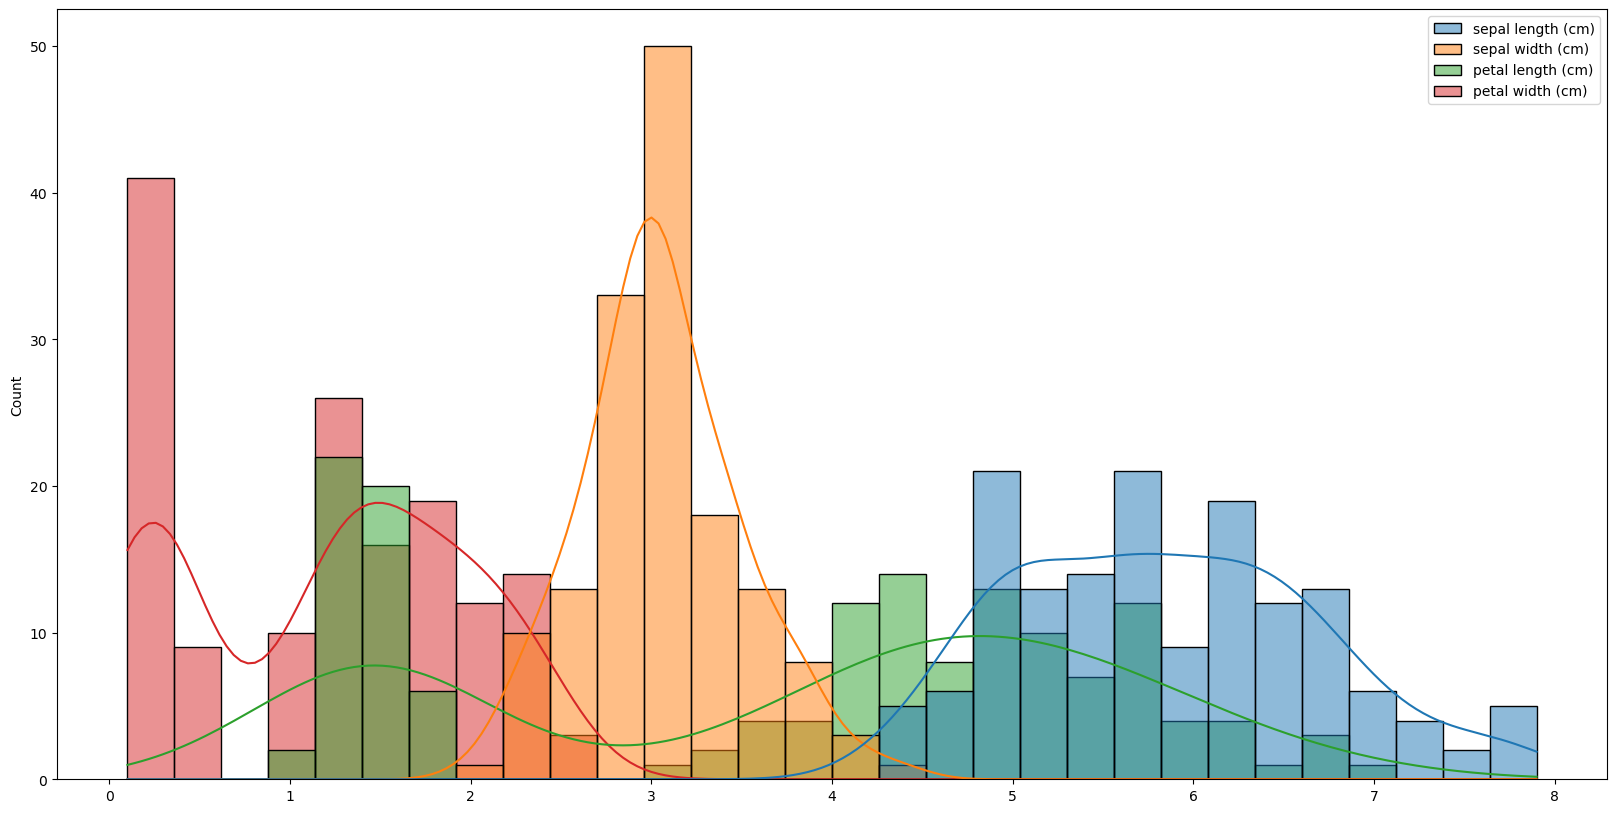

In [5]:
plt.figure(figsize = (20,10))
sns.histplot(x, kde = True, bins= 30)

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

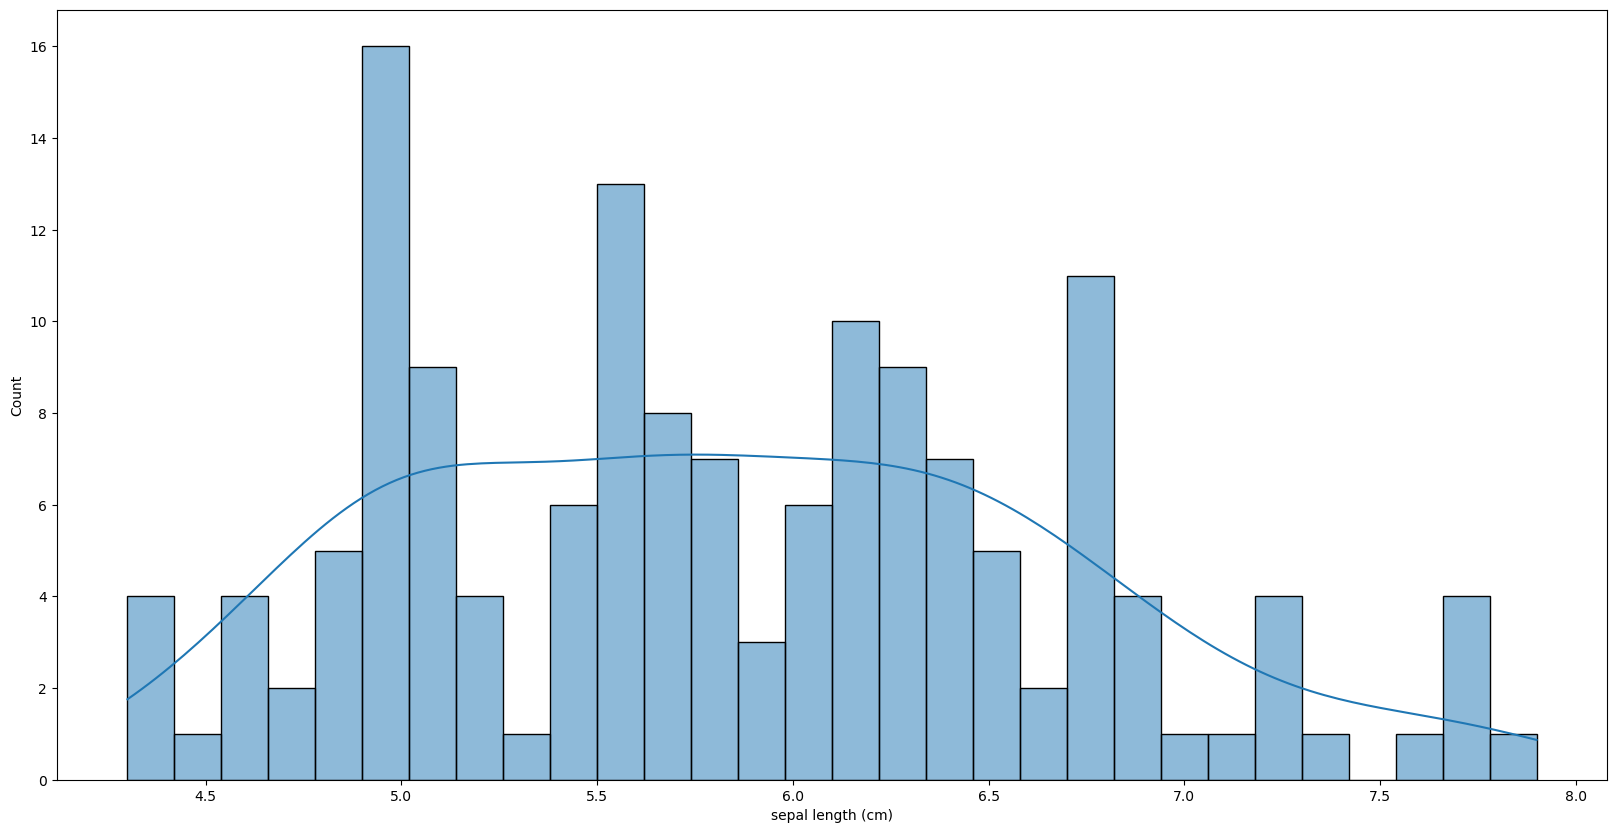

In [6]:
plt.figure(figsize = (20,10))
sns.histplot(x['sepal length (cm)'], kde = True, bins= 30)

<Axes: xlabel='petal width (cm)', ylabel='Count'>

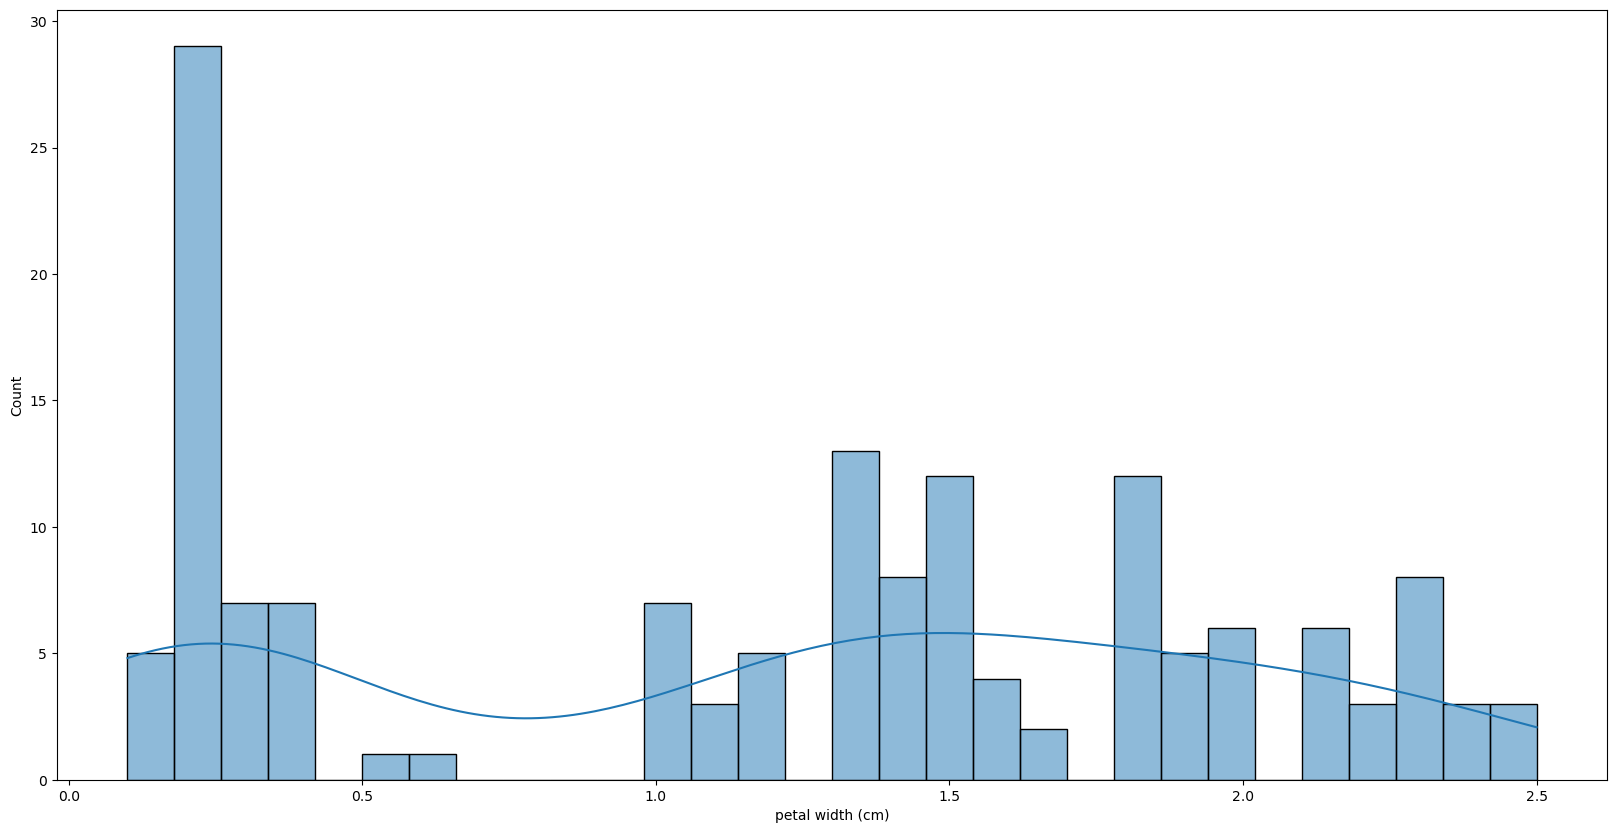

In [7]:
plt.figure(figsize = (20,10))
sns.histplot(x['petal width (cm)'], kde = True, bins= 30)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 12)

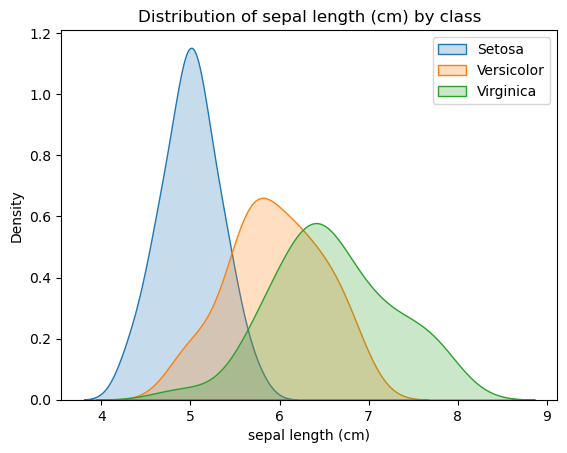

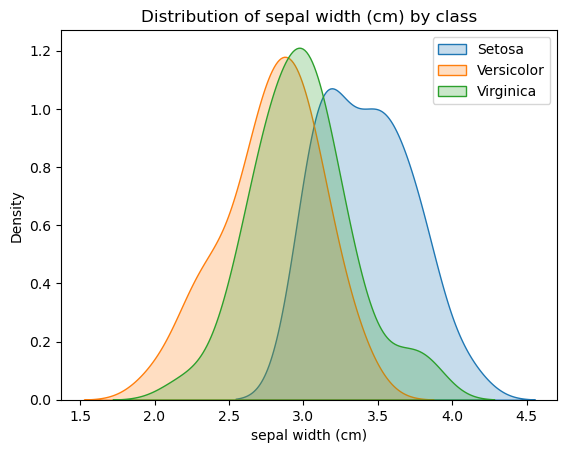

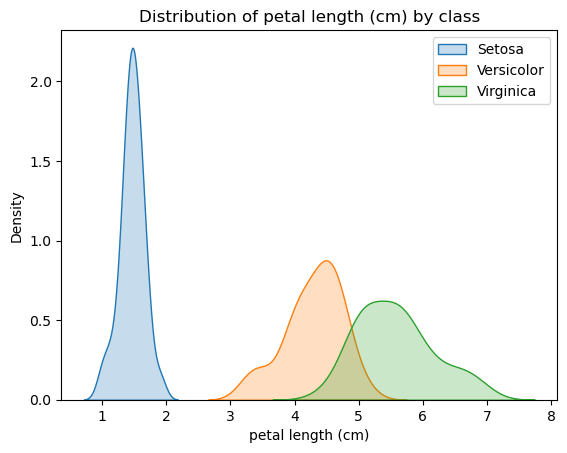

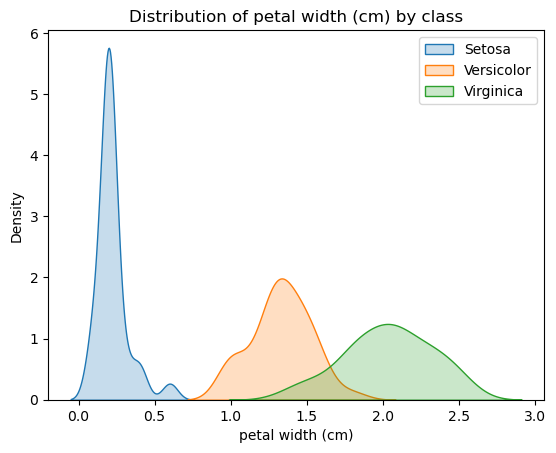

In [9]:
for feature in target_data.feature_names:
    sns.kdeplot(x_train[y_train == 0][feature], label = 'Setosa', fill = True)
    sns.kdeplot(x_train[y_train == 1][feature], label = 'Versicolor', fill = True)
    sns.kdeplot(x_train[y_train == 2][feature], label = 'Virginica', fill = True)
    plt.xlabel(feature)
    plt.title(f"Distribution of {feature} by class")
    plt.legend()
    plt.show()

In [10]:
model = GaussianNB()


In [11]:
model.fit(x_train, y_train)

GaussianNB()

In [12]:
pred = model.predict(x_test)

In [13]:
pred

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0])

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [15]:
confusion_matrix(y_test, pred)

array([[20,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 11]], dtype=int64)

In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [17]:
print(np.round(accuracy_score(y_test, pred)*100), "%")

98.0 %


# Custom Dataset

In [18]:

data = pd.read_csv("Naive Bias Dataset.csv")
data.head()

,ID,Score,Sex,Age,Authority,Money,Product no,Balance (estimated),Exited
0,15634602,619,0,42,2,0.00,1,101348.88,1
1,15647311,608,0,41,1,83807.86,1,112542.58,0
2,15619304,502,0,42,8,159660.80,3,113931.57,1
3,15701354,699,0,39,1,0.00,2,93826.63,0
4,15737888,850,0,43,2,125510.82,1,79084.10,0


In [19]:
data.isnull().sum()

ID                     0
Score                  0
Sex                    0
Age                    0
Authority              0
Money                  0
Product no             0
Balance (estimated)    0
Exited                 0
dtype: int64

In [20]:
data.Exited.unique()

array([1, 0], dtype=int64)

In [21]:
X = data.drop(['ID', "Exited"], axis=1)
X.head()

,Score,Sex,Age,Authority,Money,Product no,Balance (estimated)
0,619,0,42,2,0.00,1,101348.88
1,608,0,41,1,83807.86,1,112542.58
2,502,0,42,8,159660.80,3,113931.57
3,699,0,39,1,0.00,2,93826.63
4,850,0,43,2,125510.82,1,79084.10


In [22]:
Y = data.Exited
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 12)

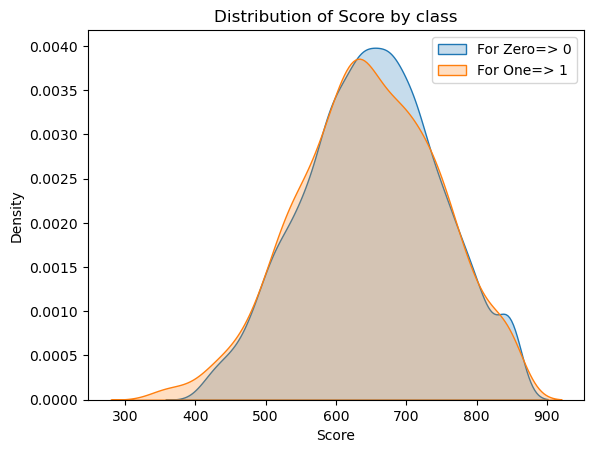

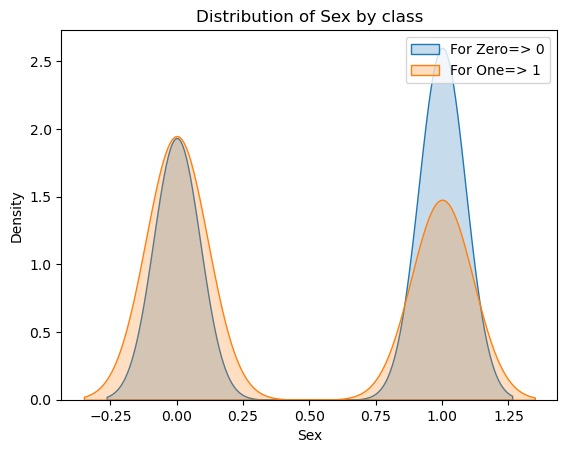

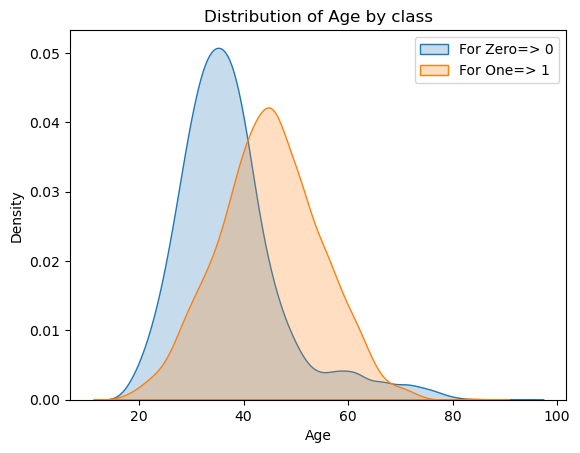

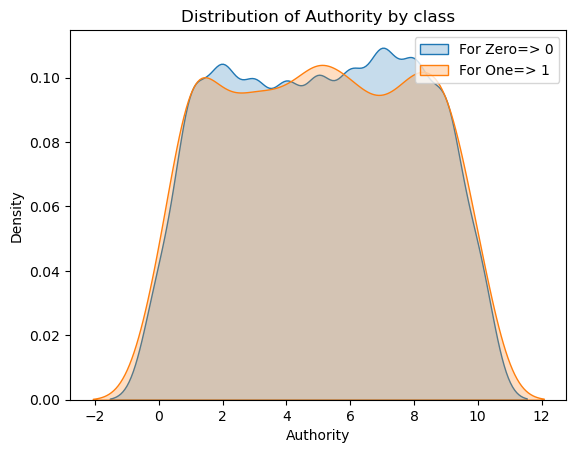

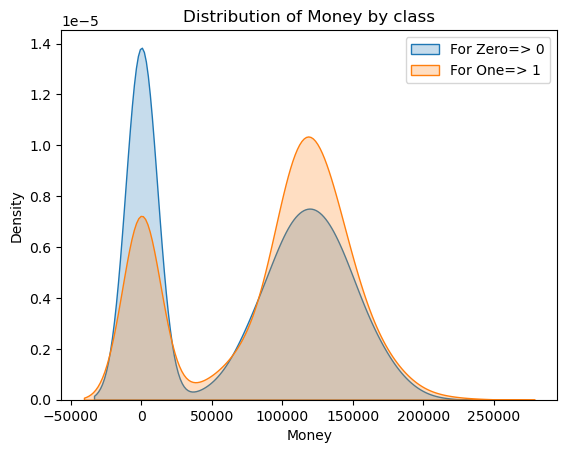

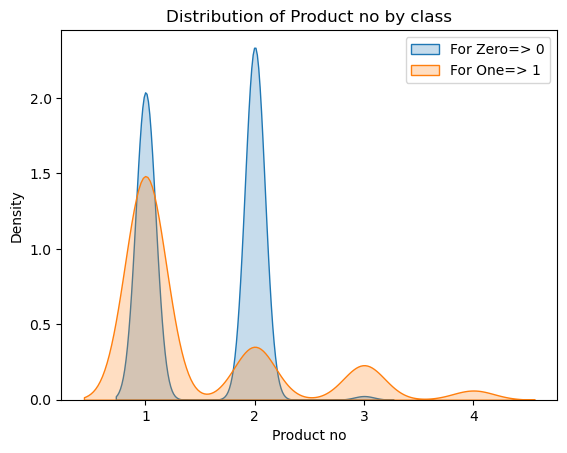

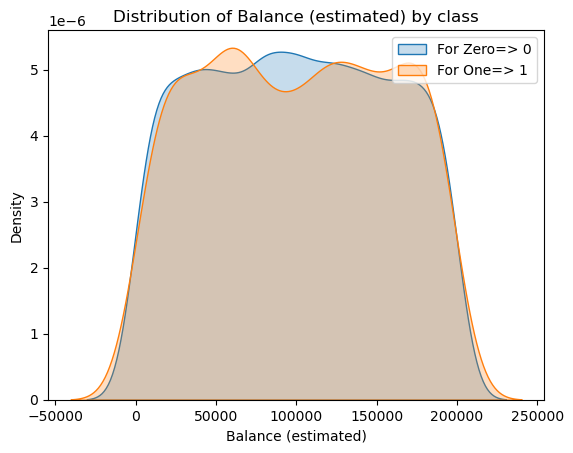

In [24]:
for feature in X.columns:
    sns.kdeplot(x_train[y_train == 0][feature], label = 'For Zero=> 0', fill = True)
    sns.kdeplot(x_train[y_train == 1][feature], label = 'For One=> 1', fill = True)
    plt.xlabel(feature)
    plt.title(f"Distribution of {feature} by class")
    plt.legend()
    plt.show()

In [25]:
model = GaussianNB()

In [26]:
model.fit(x_train, y_train)

GaussianNB()

0    7963
1    2037
Name: Exited, dtype: int64


<Axes: xlabel='Exited', ylabel='count'>

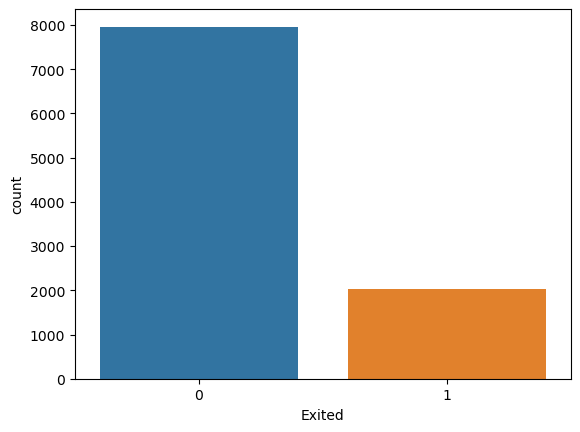

In [27]:
print(data["Exited"].value_counts())
sns.countplot(x = data["Exited"])

In [28]:
pred = model.predict(x_test)

In [29]:
confusion_matrix(y_test, pred)

array([[2280,   74],
       [ 606,   40]], dtype=int64)

In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2354
           1       0.35      0.06      0.11       646

    accuracy                           0.77      3000
   macro avg       0.57      0.52      0.49      3000
weighted avg       0.70      0.77      0.71      3000



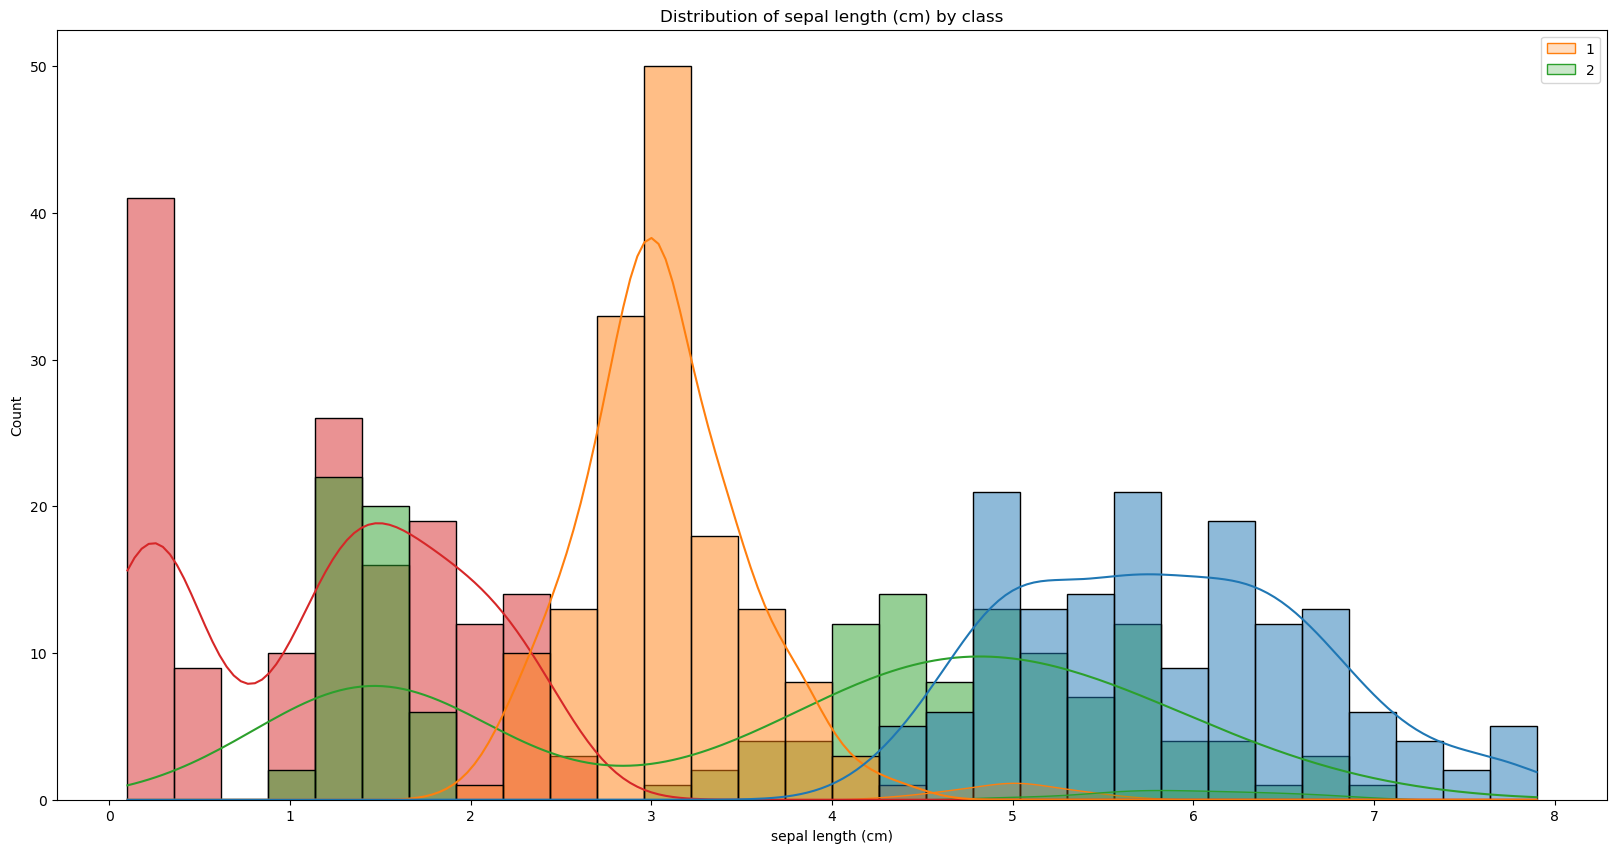

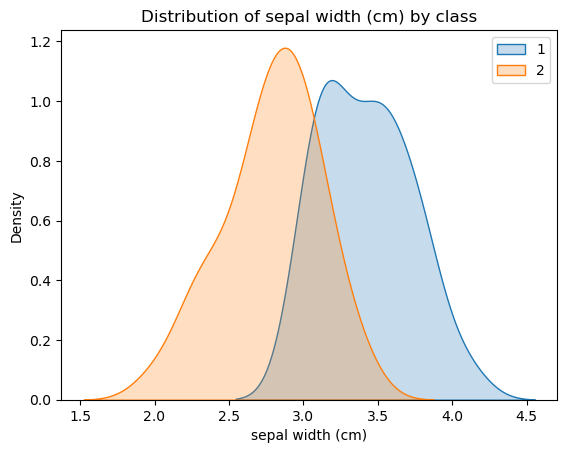

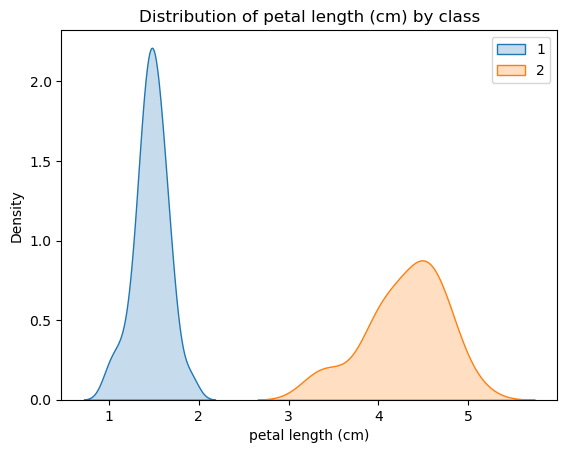

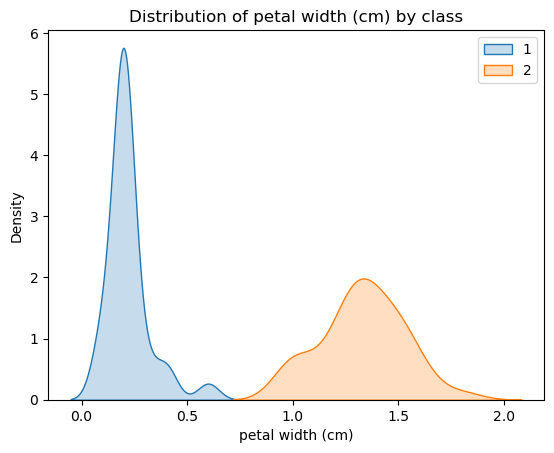

Confusion Matrix : 
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy :  98.0 %


In [31]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = pd.DataFrame(data = target_data.data, columns = target_data.feature_names)
y = target_data.target
plt.figure(figsize = (20,10))
sns.histplot(x, kde = True, bins= 30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 12)
for feature in target_data.feature_names:
    sns.kdeplot(x_train[y_train == 0][feature], label = '1', fill = True)
    sns.kdeplot(x_train[y_train == 1][feature], label = '2', fill = True)
    plt.xlabel(feature)
    plt.title(f"Distribution of {feature} by class")
    plt.legend()
    plt.show()
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Accuracy : ",np.round(accuracy_score(y_test, pred)*100), "%")